## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [4]:
df.shape

(202772, 12)

In [5]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [6]:
print(df_age['위해증상'].str.contains('해당없음 - 해당없음').sum())
print(df_age['위해부위'].str.contains('해당없음 / 해당없음').sum())

0
0


In [7]:
df_v1 = df_age[df_age['품목대분류'] == '건축/인테리어 자재 및 작업공구']
df_v1['품목대분류'].unique()

array(['건축/인테리어 자재 및 작업공구'], dtype=object)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,범주형 발생일,위해원인,위해증상,위해부위,발생장소
28447,남자,50-54,20200621-30,파열·파손·꺾여짐,열상(찢어짐),(부위)발목,주택 - 화장실/욕실
28448,여자,20-24,20200811-20,예리함·마감처리 불량,열상(찢어짐),(부위)팔꿈치,주택 - 화장실/욕실
28449,남자,45-49,20200821-31,예리함·마감처리 불량,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실
28450,남자,50-54,20200311-20,부딪힘,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실
28451,남자,65-69,20200821-31,예리함·마감처리 불량,열상(찢어짐),(부위)생식기 주변 및 회음부,주택 - 화장실/욕실


In [9]:
df_v1 = df_v1.drop(columns=['범주형 발생일'])
df_v1

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
28447,남자,50-54,파열·파손·꺾여짐,열상(찢어짐),(부위)발목,주택 - 화장실/욕실
28448,여자,20-24,예리함·마감처리 불량,열상(찢어짐),(부위)팔꿈치,주택 - 화장실/욕실
28449,남자,45-49,예리함·마감처리 불량,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실
28450,남자,50-54,부딪힘,열상(찢어짐),(부위)손가락,주택 - 화장실/욕실
28451,남자,65-69,예리함·마감처리 불량,열상(찢어짐),(부위)생식기 주변 및 회음부,주택 - 화장실/욕실
...,...,...,...,...,...,...
202754,남자,75-79,추락,열상(찢어짐),(부위)머리 및 뇌(뇌막),"기타 - 상세불명의 장소, 부대·부속시설"
202758,여자,35-39,미끄러짐·넘어짐,열상(찢어짐),(부위)머리 및 뇌(뇌막),주택 - 화장실/욕실
202763,여자,80-84,미끄러짐·넘어짐,타박상,(부위)무릎,주택 - 침실/방
202765,남자,75-79,추락,출혈 및 혈종,(부위)코,"기타 - 상세불명의 장소, 부대·부속시설"


## 1. 빈발항목 분석

In [10]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
df_encoded.shape

(38667, 245)

In [12]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

미끄러짐·넘어짐          28767
여자                19607
남자                19054
열상(찢어짐)           15981
주택 - 화장실/욕실       12151
0-4                9853
주택 - 거실            8805
주택 - 침실/방          8574
골절                 8090
(부위)머리 및 뇌(뇌막)     7648
dtype: int64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45124 (\N{HANGUL SYLLABLE GGEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjay

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

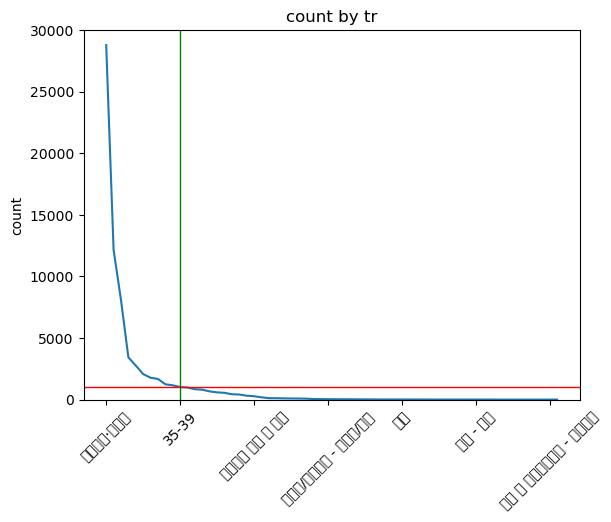

In [13]:
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=1000, color='r', linewidth=1)

plt.show()
# (38667, 477)
# 10%(48/477)의 항목 2.5%(1000/38667*100) 발생 -> min_support=0.025 으로 해보자

- 미끄러짐.넘어짐 범주가 약 30,000회 정도 발생함

- 이 이후로 급격하게 빈도수가 감소

In [14]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets

,support,itemsets
0,0.492772,(남자)
1,0.413298,(열상(찢어짐))
2,0.314247,(주택 - 화장실/욕실)
3,0.507073,(여자)
4,0.254817,(0-4)
5,0.209222,(골절)
6,0.197791,((부위)머리 및 뇌(뇌막))
7,0.743968,(미끄러짐·넘어짐)
8,0.177542,(타박상)
9,0.221739,(주택 - 침실/방 )


#### [주요 빈발 집합 분석]
- 여자: 50.7% 남자: 49.3%로 여자와 남자 거의 비슷한 빈도로 등장함 >> 딱히 성별 대비 차이는 있지 않음

- 열상(찢어짐)은 41.3% 빈번히 발생

- 주택 - 화장실/욕실에서 31.4% 자주 발생

- 주로 0~4세 연령대 영유아들이 35.4%

종합해보면, 빈발 집합으로는 남성과 여성 모두 높은 비율을 차지하고 있고, 찢어짐과 관련된 사건이 빈발하고 있는데 이는 주택의 화장실/욕실에서 빈발하게 발생중이며, 주로 0~4세 연령대 영유아들에게서 빈발하게 발생중

In [15]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.492772,(남자),1
1,0.413298,(열상(찢어짐)),1
2,0.314247,(주택 - 화장실/욕실),1
3,0.507073,(여자),1
4,0.254817,(0-4),1


In [16]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2

,support,itemsets,length
11,0.333437,"(남자, 미끄러짐·넘어짐)",2
12,0.253084,"(남자, 열상(찢어짐))",2
13,0.160188,"(열상(찢어짐), 여자)",2
14,0.296842,"(열상(찢어짐), 미끄러짐·넘어짐)",2
15,0.174335,"(남자, 열상(찢어짐), 미끄러짐·넘어짐)",3
16,0.122508,"(열상(찢어짐), 미끄러짐·넘어짐, 여자)",3
17,0.137714,"(남자, 주택 - 화장실/욕실)",2
18,0.114309,"(열상(찢어짐), 주택 - 화장실/욕실)",2
19,0.176507,"(여자, 주택 - 화장실/욕실)",2
20,0.296584,"(미끄러짐·넘어짐, 주택 - 화장실/욕실)",2


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

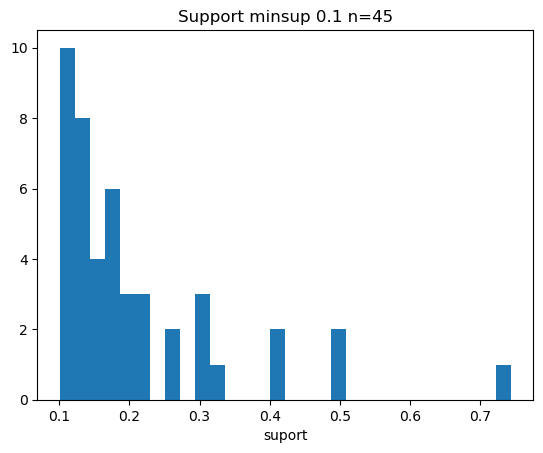

In [17]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsup {min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

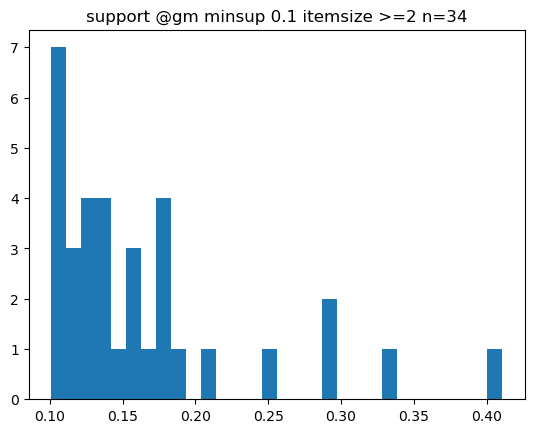

In [18]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'support @gm minsup {min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [19]:
#최소 지지도 0.1로 빈발 항목 집합을 분석한 결과에서 2개 이상의 항목을 포함하는 집합들 중 지지도가 높은 상위 6개 항목 집합
freq_its_2[freq_its_2.support >= 0.20].sort_values(by='support', ascending=False)

,support,itemsets,length
24,0.410505,"(미끄러짐·넘어짐, 여자)",2
11,0.333437,"(남자, 미끄러짐·넘어짐)",2
14,0.296842,"(열상(찢어짐), 미끄러짐·넘어짐)",2
20,0.296584,"(미끄러짐·넘어짐, 주택 - 화장실/욕실)",2
12,0.253084,"(남자, 열상(찢어짐))",2
43,0.206765,"(미끄러짐·넘어짐, 주택 - 거실 )",2


#### [빈발 항목 집합을 분석한 결과에서 2개 이상의 항목을 포함하는 집합들 중 지지도가 높은 상위 6개 항목 집합]

-  (미끄러짐·넘어짐, 여자) &  (남자, 미끄러짐·넘어짐) 지지도: 0.41 & 지지도: 0.33
>> 전체 데이터셋에서 미끄러짐.넘어짐과 여자 항목 / 남자 항목이 함꼐 나타남. 여자 항목과 같이 나타나는 빈도가 0.08 정도 더 높음 하지만, 남성과 여성 모두 미끄러짐.넘어짐 사고를 자주 경험

- (미끄러짐·넘어짐, 열상(찢어짐)) 지지도: 0.298
>> 미끄러잠. 넘어짐과 열상(찢어짐) 항목이 함꼐 나타나는데 미끄러지거나 넘어지는 사고와 함께 찢어짐 사고가 자주 발생

- (미끄러짐·넘어짐, 주택 - 화장실/욕실) 지지도: 0.296
>> 화장실이나 요길에서 미끄러지거나 넘어지는 사고가 빈번하게 발생함

- (남자, 열상(찢어짐))	지지도: 0.253
>> 남성이 찢어짐 사고를 자주 경험

- (주택 - 거실 , 미끄러짐·넘어짐) 지지도: 0.206
>> 화장실이나 욕실에서 뿐만 아니라 거실에서도 미끄러지거나 넘어지는 사고가 발생중임

#### [종합 ]
- 남성과 여성 모두 미끄러짐.넘어짐 사고를 자주 경험

- 화장실/욕실에서 더 빈번하게 발생하나, 거실에서도 빈번하게 발생중 즉, 주택 내부에서 사고가 많이 발생

- 미끄러지거나 넘어짐으로 인해 찢어짐 사고를 경험

----

## 2. 연관규칙 분석

In [20]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(주택 - 화장실/욕실, 여자)",(미끄러짐·넘어짐),0.176507,0.743968,0.169421,0.959853,1.290182,0.038105,6.377446,0.273124
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747
40,"(주택 - 거실 , 여자)",(미끄러짐·넘어짐),0.118008,0.743968,0.109551,0.928337,1.247818,0.021757,3.572707,0.225174
30,"(골절, 여자)",(미끄러짐·넘어짐),0.140559,0.743968,0.129982,0.924747,1.242993,0.025410,3.402287,0.227462
10,"(남자, 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.137714,0.743968,0.127137,0.923192,1.240904,0.024682,3.333428,0.225141
39,(주택 - 거실 ),(미끄러짐·넘어짐),0.227714,0.743968,0.206765,0.908007,1.220492,0.037354,2.783166,0.233927
11,"(열상(찢어짐), 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.114309,0.743968,0.103706,0.907240,1.219461,0.018664,2.760153,0.203193
33,((부위)머리 및 뇌(뇌막)),(미끄러짐·넘어짐),0.197791,0.743968,0.176274,0.891213,1.197919,0.029124,2.353527,0.205956
28,(골절),(미끄러짐·넘어짐),0.209222,0.743968,0.182688,0.873177,1.173676,0.027033,2.018812,0.187127
25,"(열상(찢어짐), 0-4)",(미끄러짐·넘어짐),0.156438,0.743968,0.132413,0.846421,1.137712,0.016028,1.667104,0.143490


In [21]:
rules_conf_top=rules_conf.head(30)

### 최소 신뢰도 0.5 이상의 상위 규칙

- 여자, 주택 - 화장실/욕실 → 미끄러짐·넘어짐 : 전체 데이터 중 16.94% 동시에 발생. 전건이 발생했을 때 후건이 발생할 확률이 95.98%. 또 lift향상도가 1이상이므로 전건과 후건은 양의 상관관계를 가짐.

- (주택 - 화장실/욕실) -> (미끄러짐·넘어짐) : 전체 데이터 중 29.66% 동시에 발생. 전건이 발생했을 때 후건이 발생할 확률이 94.38%

- (주택 - 거실, 여자) -> (미끄러짐·넘어짐) : 전체 데이터 중 10.96% 동시에 발생 전건이 발생했을 때 후건이 발생할 확률 92.83

- (골절, 여자) -> (미끄러짐·넘어짐): 전체 데이터 중 12.99% 동시에 발생 전건이 발생했을 떄 후건이 발생할 확률 92.47%

- (주택 - 화장실/욕실, 남자) -> (미끄러짐·넘어짐): 12.71% 동시에 발생함. 전건이 발생했을 때 후건이 발생할 확률이 92.32%

>> 전체적인 추세로 여성과 화장실/욕실, 거실에서 사고 발생확률이 높음

>> 상위 5개 항목 모두 신뢰도가 높지만, 여자와 주택-화장실/욕실 --- 미끄러짐.넘어짐을 유발하는 확률이 거의 96%인 만큼 전건의 전제가 만족되었을 때 후건은 거의 발생함.

>> 주택 - 화장실/욕실 환경에서 사고가 많이 발생함.

>> 골절과 여자의 조건절은 미끄러짐.넘어짐 사고가 발생하는 결론절이 발생할 확률이 특히 매우 높음 

----

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

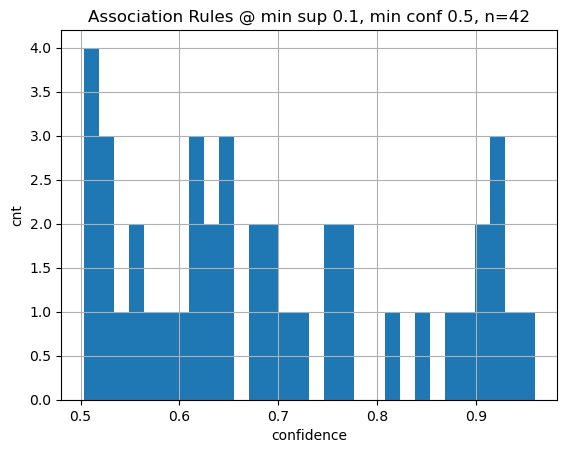

In [22]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

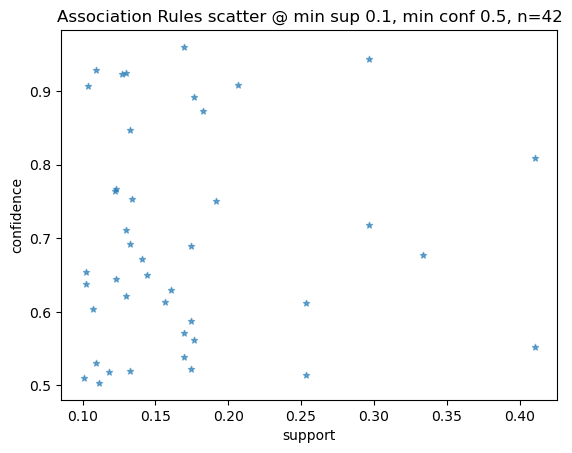

In [23]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

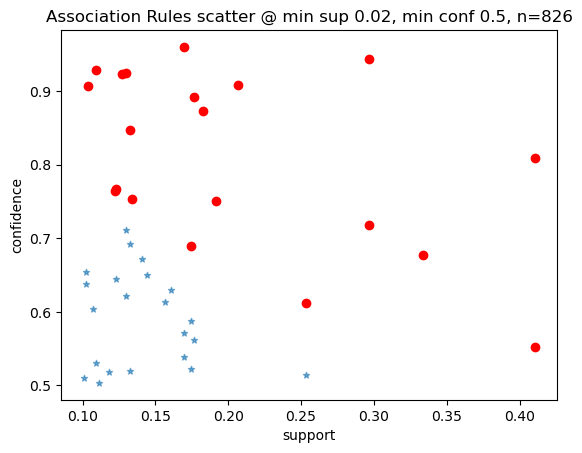

In [24]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [25]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747,1.240374
16,(여자),(미끄러짐·넘어짐),0.507073,0.743968,0.410505,0.809558,1.088163,0.033259,1.344409,0.164364,1.220063
12,"(주택 - 화장실/욕실, 여자)",(미끄러짐·넘어짐),0.176507,0.743968,0.169421,0.959853,1.290182,0.038105,6.377446,0.273124,1.129274
39,(주택 - 거실 ),(미끄러짐·넘어짐),0.227714,0.743968,0.206765,0.908007,1.220492,0.037354,2.783166,0.233927,1.114772
33,((부위)머리 및 뇌(뇌막)),(미끄러짐·넘어짐),0.197791,0.743968,0.176274,0.891213,1.197919,0.029124,2.353527,0.205956,1.067488
28,(골절),(미끄러짐·넘어짐),0.209222,0.743968,0.182688,0.873177,1.173676,0.027033,2.018812,0.187127,1.055865
30,"(골절, 여자)",(미끄러짐·넘어짐),0.140559,0.743968,0.129982,0.924747,1.242993,0.025410,3.402287,0.227462,1.054729
10,"(남자, 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.137714,0.743968,0.127137,0.923192,1.240904,0.024682,3.333428,0.225141,1.050329
40,"(주택 - 거실 , 여자)",(미끄러짐·넘어짐),0.118008,0.743968,0.109551,0.928337,1.247818,0.021757,3.572707,0.225174,1.037887
3,(열상(찢어짐)),(미끄러짐·넘어짐),0.413298,0.743968,0.296842,0.718228,0.965402,-0.010638,0.908650,-0.057567,1.015070


In [26]:
# indices_to_drop = [4,7,35,19,20,3,11,0,24,40]  
# top_20_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)
# top_20_rules

In [27]:
top_20_rules = top_20_rules.sort_values(by='confidence', ascending=False)
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
12,"(주택 - 화장실/욕실, 여자)",(미끄러짐·넘어짐),0.176507,0.743968,0.169421,0.959853,1.290182,0.038105,6.377446,0.273124,1.129274
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747,1.240374
40,"(주택 - 거실 , 여자)",(미끄러짐·넘어짐),0.118008,0.743968,0.109551,0.928337,1.247818,0.021757,3.572707,0.225174,1.037887
30,"(골절, 여자)",(미끄러짐·넘어짐),0.140559,0.743968,0.129982,0.924747,1.242993,0.025410,3.402287,0.227462,1.054729
10,"(남자, 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.137714,0.743968,0.127137,0.923192,1.240904,0.024682,3.333428,0.225141,1.050329
39,(주택 - 거실 ),(미끄러짐·넘어짐),0.227714,0.743968,0.206765,0.908007,1.220492,0.037354,2.783166,0.233927,1.114772
11,"(열상(찢어짐), 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.114309,0.743968,0.103706,0.907240,1.219461,0.018664,2.760153,0.203193,1.010946
33,((부위)머리 및 뇌(뇌막)),(미끄러짐·넘어짐),0.197791,0.743968,0.176274,0.891213,1.197919,0.029124,2.353527,0.205956,1.067488
28,(골절),(미끄러짐·넘어짐),0.209222,0.743968,0.182688,0.873177,1.173676,0.027033,2.018812,0.187127,1.055865
25,"(열상(찢어짐), 0-4)",(미끄러짐·넘어짐),0.156438,0.743968,0.132413,0.846421,1.137712,0.016028,1.667104,0.143490,0.978834


### s + c 상위 20개 -> lift, leverage, conviction 유의미하지 않은 값 필터링 -> confidence기준 정렬

- (주택 - 화장실/욕실, 여자) → (미끄러짐·넘어짐): confidence 값이 95.98%로 화장실/욕실에 있는 여성이 미끄러짐 사고를 당할 가능성이 매우 높음. leverage값이 양수이므로 이는 유의미한 상관관계를 가짐을 알 수 있고 conviction이 6.37로, 이 규칙이 강한 신뢰성을 가지고 있음을 알 수 있다.

- (주택 - 화장실/욕실) → (미끄러짐·넘어짐): confidence 값이 94.37%로 주택의 화장실/욕실에서 미끄러짐 사고를 당할 가능성이 매우 높음. leverage값이 양수이므로 이는 유의미한 상관관계를 가짐을 알 수 있고 conviction이 4.55로, 이 규칙이 신뢰성을 가지고 있음을 알 수 있다.

-(여자, 주택 - 거실) → (미끄러짐·넘어짐): confidence 값이 92.83%로 여성이 주택의 거실에서 미끄러짐 사고를 당할 가능성이 매우 높음. leverage값이 양수이므로 이는 유의미한 상관관계를 가짐을 알 수 있고 conviction이 3.57로, 이 규칙이 신뢰성을 가지고 있음을 알 수 있다.

-(골절, 여자) → (미끄러짐·넘어짐): confidence 값이 92.47%로 골절을 경험한 여성이 미끄러짐 사고를 당할 가능성이 매우 높음. leverage값이 양수이므로 이는 유의미한 상관관계를 가짐을 알 수 있고 conviction이 3.40로, 이 규칙이 신뢰성을 가지고 있음을 알 수 있다.

- (주택 - 화장실/욕실, 남자) → (미끄러짐·넘어짐): confidence 값이 92.32%로 남성이 주택의 화장실/욕실에서 미끄러질 가능성이 매우 높음. leverage값이 양수이므로 이는 유의미한 상관관계를 가짐을 알 수 있고 conviction이 3.33로, 이 규칙이 신뢰성을 가지고 있음을 알 수 있다.

-(주택 - 거실) → (미끄러짐·넘어짐): 주택의 거실에서 미끄러짐 사고가 자주 발생한다는 것을 나타냄. 높은 신뢰도와 향상도는 규칙이 유의미함을 주며 leverage 값이 0.037354로, 규칙의 발생 빈도가 무작위보다 높다.

-(주택 - 화장실/욕실, 열상(찢어짐)) → (미끄러짐·넘어짐): 화장실/욕실에서 열상을 경험한 사람이 미끄러질 가능성이 높다는 것을 나타냄. 높은 신뢰도와 향상도는 규칙이 유의미함을 보여주며 leverage  값이 0.018664로, 규칙의 발생 빈도가 무작위보다 높다. 

-((부위)머리 및 뇌(뇌막)) → (미끄러짐·넘어짐): 머리 및 뇌 부위에 부상을 입은 사람이 미끄러질 가능성이 높다는 것을 나타냄

- (골절) → (미끄러짐·넘어짐): 골절을 경험한 사람이 미끄러질 가능성이 높다는 것을 나타냄. 

-(0-4, 열상(찢어짐)) → (미끄러짐·넘어짐): 
0-4세 아이들이 열상을 경험한 후 미끄러질 가능성이 높다는 것을 나타냄. 



>> [종합적 인사이트]

(1) 화장실/욕실의 높은 위험성: 화장실/욕실이 사고의 주요 발생 장소로 나타나고 있음

(2) 여성의 높은 사고 위험: 주택의 화장실/욕실, 거실에서 여성이 미끄러짐 사고를 당할 가능성이 높음.

(3) 골절 및 부상 후 재발 위험: 골절이나 열상과 같은 부상을 입은 사람들이 다시 미끄러질 가능성이 높습니다.

(4) 0~4세 연령대 영유아의 높은 사고 위험


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

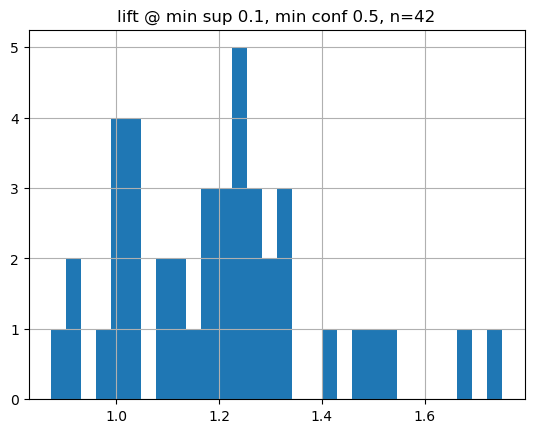

In [28]:
# 향상도 관찰
# 연관규칙의 향상도 분포
rules_conf.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [29]:
#향상도 값이 1이상인 행들만 필터링
filter = rules_conf.lift.ge(1)
rules_conf[filter]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
1,(남자),(열상(찢어짐)),0.492772,0.413298,0.253084,0.513593,1.242669,0.049422,1.206195,0.384996,0.766677
2,(열상(찢어짐)),(남자),0.413298,0.492772,0.253084,0.612352,1.242669,0.049422,1.308477,0.332845,0.865436
5,"(남자, 미끄러짐·넘어짐)",(열상(찢어짐)),0.333437,0.413298,0.174335,0.522842,1.265048,0.036526,1.229575,0.314323,0.697177
6,"(열상(찢어짐), 미끄러짐·넘어짐)",(남자),0.296842,0.492772,0.174335,0.587297,1.191825,0.028059,1.229041,0.228897,0.761632
7,"(열상(찢어짐), 여자)",(미끄러짐·넘어짐),0.160188,0.743968,0.122508,0.764772,1.027964,0.003333,1.088445,0.032393,0.887280
8,(주택 - 화장실/욕실),(여자),0.314247,0.507073,0.176507,0.561682,1.107694,0.017161,1.124588,0.141777,0.738189
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747,1.240374
10,"(남자, 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.137714,0.743968,0.127137,0.923192,1.240904,0.024682,3.333428,0.225141,1.050329
11,"(열상(찢어짐), 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.114309,0.743968,0.103706,0.907240,1.219461,0.018664,2.760153,0.203193,1.010946
12,"(주택 - 화장실/욕실, 여자)",(미끄러짐·넘어짐),0.176507,0.743968,0.169421,0.959853,1.290182,0.038105,6.377446,0.273124,1.129274


### 향상도 1이상인 행 추출 분석

- [여성]
(골절, 여자) -> (미끄러짐·넘어짐): 신뢰도 92.47%, 향상도 1.243
(여자, 미끄러짐·넘어짐) -> (골절): 신뢰도 64.13%, 향상도 1.324

- [남성]
(열상(찢어짐), 남자) -> (미끄러짐·넘어짐): 신뢰도 68.88%, 향상도 0.926
(남자, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 52.28%, 향상도 1.265
(남자) -> (열상(찢어짐)): 신뢰도 51.36%, 향상도 1.243

- [0~4 연령대]
(0-4, 열상(찢어짐)) -> (미끄러짐·넘어짐): 신뢰도 84.64%, 향상도 1.138
(0-4, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 69.22%, 향상도 1.675
(0-4) -> (열상(찢어짐), 미끄러짐·넘어짐): 신뢰도 51.96%, 향상도 1.751

(0-4) -> (미끄러짐·넘어짐): 신뢰도 75.07%, 향상도 1.009
(0-4, 남자) -> (미끄러짐·넘어짐): 신뢰도 76.71%, 향상도 1.031


- [연령대에서 심화분석]
(1) 화장실/욕실에서 미끄러졌을 때
(0-4, 화장실/욕실, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 69.22%, 향상도 1.675
(0-4, 화장실/욕실, 미끄러짐·넘어짐) -> (골절): 신뢰도 51.96%, 향상도 1.751

(2) 거실에서 미끄러졌을 때
(0-4, 거실, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 76.71%, 향상도 1.031
(0-4, 거실, 미끄러짐·넘어짐) -> (타박상): 신뢰도 51.96%, 향상도 1.751


(3) 남아
(0-4, 남자, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 64.32%, 향상도 1.675
(0-4, 남자, 미끄러짐·넘어짐) -> (타박상): 신뢰도 55.12%, 향상도 1.327

(4) 여아
(0-4, 여자, 미끄러짐·넘어짐) -> (열상(찢어짐)): 신뢰도 69.22%, 향상도 1.675
(0-4, 여자, 미끄러짐·넘어짐) -> (골절): 신뢰도 51.96%, 향상도 1.751

- [종합 결론]

(1) 주요 부상 종류

여성: 골절
남성: 열상(찢어짐)
0~4세: 열상(찢어짐), 골절, 타박상

(2) 장소별 부상

화장실/욕실: 열상(찢어짐), 골절
거실: 열상(찢어짐), 타박상

(3) 성별에 따른 부상

남아: 열상(찢어짐), 타박상
여아: 열상(찢어짐), 골절

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

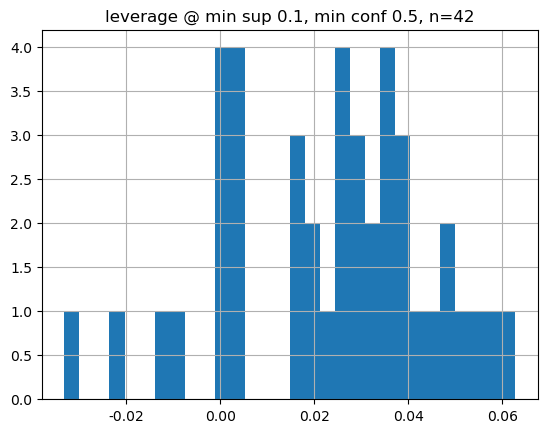

In [30]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
rules_conf.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [31]:
filter = rules_conf.leverage.ge(0.04)
rules_conf[filter]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
1,(남자),(열상(찢어짐)),0.492772,0.413298,0.253084,0.513593,1.242669,0.049422,1.206195,0.384996,0.766677
2,(열상(찢어짐)),(남자),0.413298,0.492772,0.253084,0.612352,1.242669,0.049422,1.308477,0.332845,0.865436
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747,1.240374
14,(주택 - 화장실/욕실),"(미끄러짐·넘어짐, 여자)",0.314247,0.410505,0.169421,0.539133,1.313340,0.040421,1.279099,0.347913,0.708554
18,(0-4),(열상(찢어짐)),0.254817,0.413298,0.156438,0.613925,1.485428,0.051123,1.519656,0.438541,0.770363
24,"(0-4, 미끄러짐·넘어짐)",(열상(찢어짐)),0.191300,0.413298,0.132413,0.692173,1.674753,0.053349,1.905944,0.498204,0.824585
26,(0-4),"(열상(찢어짐), 미끄러짐·넘어짐)",0.254817,0.296842,0.132413,0.519639,1.750555,0.056772,1.463810,0.575365,0.652051
31,(골절),"(미끄러짐·넘어짐, 여자)",0.209222,0.410505,0.129982,0.621261,1.513406,0.044095,1.556467,0.428994,0.751242


### leverage 0.4 이상인 항목 분석

>>[여성]

미끄러지거나 넘어졌을 때 골절을 입을 가능성이 높으며, 이는 향상도 1.324로 강한 연관성을 나타나짐

>>[남성]

미끄러짐·넘어짐 후 열상을 입을 가능성이 높고, 이는 향상도 1.265로 나타나짐

>>[0~4 연령대]

미끄러짐·넘어짐과 열상(찢어짐)이 매우 강하게 연관되어 있습니다. 또 특정 장소(화장실/욕실, 거실)에서 발생하는 부상 유형도 열상과 골절이 주요 부상으로 나타나짐

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

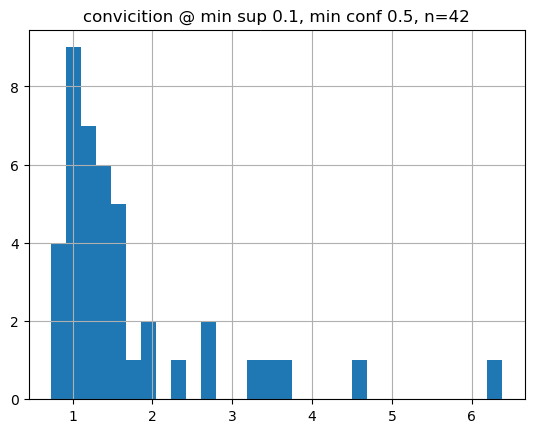

In [32]:
# 확신 관찰
# 연관규칙의 확신 분포
rules_conf.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음!!

In [33]:
'''# conviction 값이 inf가 아닌 행들만 필터링
filtered_rules_conf = rules_conf[rules_conf['conviction'] != float('inf')]

# 히스토그램 시각화
filtered_rules_conf.hist('conviction', bins=30)
plt.title(f'conviction {txt}')
plt.show()'''

"# conviction 값이 inf가 아닌 행들만 필터링\nfiltered_rules_conf = rules_conf[rules_conf['conviction'] != float('inf')]\n\n# 히스토그램 시각화\nfiltered_rules_conf.hist('conviction', bins=30)\nplt.title(f'conviction {txt}')\nplt.show()"

In [34]:
filter = rules_conf.conviction.ge(2)
rules_conf[filter]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
9,(주택 - 화장실/욕실),(미끄러짐·넘어짐),0.314247,0.743968,0.296584,0.943791,1.268591,0.062794,4.554975,0.308747,1.240374
10,"(남자, 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.137714,0.743968,0.127137,0.923192,1.240904,0.024682,3.333428,0.225141,1.050329
11,"(열상(찢어짐), 주택 - 화장실/욕실)",(미끄러짐·넘어짐),0.114309,0.743968,0.103706,0.907240,1.219461,0.018664,2.760153,0.203193,1.010946
12,"(주택 - 화장실/욕실, 여자)",(미끄러짐·넘어짐),0.176507,0.743968,0.169421,0.959853,1.290182,0.038105,6.377446,0.273124,1.129274
28,(골절),(미끄러짐·넘어짐),0.209222,0.743968,0.182688,0.873177,1.173676,0.027033,2.018812,0.187127,1.055865
30,"(골절, 여자)",(미끄러짐·넘어짐),0.140559,0.743968,0.129982,0.924747,1.242993,0.025410,3.402287,0.227462,1.054729
33,((부위)머리 및 뇌(뇌막)),(미끄러짐·넘어짐),0.197791,0.743968,0.176274,0.891213,1.197919,0.029124,2.353527,0.205956,1.067488
39,(주택 - 거실 ),(미끄러짐·넘어짐),0.227714,0.743968,0.206765,0.908007,1.220492,0.037354,2.783166,0.233927,1.114772
40,"(주택 - 거실 , 여자)",(미끄러짐·넘어짐),0.118008,0.743968,0.109551,0.928337,1.247818,0.021757,3.572707,0.225174,1.037887


In [35]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


### conviction이 2이상인 규칙 분석

- conviction이 2이상인 연관 규칙에서는 특정장소인 화장실/욕실, 거실에서 발생하는 미끄러짐.넘어짐 사고와 열상, 골절 사이의 연관성을 나타내고 있음

----

## 전체적인 추세 및 주요 발견사항

- 여성은 주로 화장실/욕실에서 미끄러짐.넘어짐 사고가 발생할 확률이 매우 높다. 이로 골절 부상을 경험할 확률이 높다 즉, 여성이 사고 발생 시 골절로 이어질 가능성이 높음

- 남성은 미끄러짐.넘어짐 사고 발생 후 열상(찢어짐) 부상을 입을 확률이 높다. 특히, 남성이라는 조건절만으로도 열상(찢어짐) 결론절이 발생할 확률이 51.36%, 향상도가 1.243으로 연관성이 강하다 즉, 남성이 사고 발생 시 찢어짐으로 이어질 가능성이 높음.

- 0~4세 연령대는 미끄러짐.넘어짐 사고 후 열상(찢어짐) 부상을 입을 확률이 높고 향상도가 1.675로 매우 강한 연관성을 보인다. 특히, 0~4세 연령대 조건절만으로도 열상(찢어짐)과 미끄러짐.넘어짐 사고가 함께 발생할 확률이 높고, 이의 향상도는 1.751로 강한 연관성을 보인다

- 화장실/욕실에서 0~4세 연령대가 미끄러짐.넘어짐 사고를 당할 경우 열상(찢어짐)과 골절을 입을 가능성이 높음

- 거실에서 0~4세 연령대가 미끄러짐.넘어짐 사고를 당할 경우 열상(찢어짐)과 타박상을 입을 가능성이 높음